# Incertidumbre

Asumimos que en un año se pueden tener dos estados diferentes: 
- $u$ que representa una mejora
- $d$ que representa un empeoramiento

Por ejemplo los flujos de caja de un proyecto vienen definidos por una vector 
$$c_1 \in \mathbb{R}^2$$
Con dos posibles estados de la naturaleza:
$$c_1^u, c_1^d \in \mathbb{R}$$

Por tanto:
$$c_1=\left(\begin{array}{crl}
c_1^u\\
c_1^d
\end{array}\right)$$

Matemáticamente recordamos que:
$$\alpha·c_1+\beta=\alpha \left(\begin{array}{crl}
c_1^u\\
c_1^d
\end{array}\right)+ \beta=\left(\begin{array}{crl}
\alpha ·c_1^u+ \beta\\
\alpha ·c_1^d+ \beta
\end{array}\right) $$

Supongamos que ahora tenemos otro vector $d_1$ que representa otro activo:
$$\alpha·c_1+\beta· d_1=\left(\begin{array}{crl}
\alpha ·c_1^u+ \beta·d_1^u \\
\alpha ·c_1^d+ \beta· d_1^d
\end{array}\right) $$

In [72]:
import numpy as np

In [73]:
c0 = -10
c1 = np.array((20, 5))

In [74]:
type(c1)

numpy.ndarray

In [75]:
c1

array([20,  5])

In [76]:
c = (c0, c1)

In [77]:
c

(-10, array([20,  5]))

In [78]:
1.5 * c1 + 2

array([32. ,  9.5])

In [79]:
c1 + 1.5 * np.array((10, 4))

array([35., 11.])

# Activo Financiero

El precio actual es $S_0 \in \mathbb{R}$. Suponemos que sólo puede tener dos precios transcurrido un periodo $S_1^u, S_1^d \in \mathbb{R}$ con  $S_1^u > S_1^d$. La evolución del precio de una activo financiero viene definida por $S: \mathbb{N}_0 \times \rightarrow \mathbb{R}_{\geq 0}$ representa la reacción temporal del activo ante los posibles estados de la economía.

In [80]:
S0 = 10
S1 = np.array((12.5, 7.5))
S = (S0, S1)
S

(10, array([12.5,  7.5]))

In [81]:
S[0]

10

In [82]:
S[1][0]

12.5

# Riesgo

Podemos asignar a cada estado de la naturaleza una probabilidad de ocurrencia $p\in \mathbb{R}_{\geq 0}$ con $0\leq p \leq 1$

## Medida de probabilidad

La medida de probabilidad es una función $P :\wp (\{u,d\}) \leftarrow \mathbb{R}_{\geq 0}$ asignando todos los elementos del conjunto de potencias de $\{u,d\}$ al intervalo unitario. En este caso, el conjunto de potencias engloba todos los sucesos físicamente posibles.

En este contexto el conjunto $\{u,d\}$ también se denomina espacio de estados y se simboliza mediante $\Omega$. La tripleta $(\Omega, \wp (\Omega), P)$ define el espacio probabilístico.

Para que una función $P$ se pueda considerar una medida de probabilidad debe cumplir tres condiciones:
1. $P(\emptyset)=0$
2. $0\leq P(\omega),\omega \in \Omega \leq 1$
3. $P(\Omega)=P(u)+P(d)=1$

En un modelo simple de dos estados posibles es conveniente $P(u)=p$ y que $P(d)=1-p$. Con ello estamos definiendo una economía con riesgo

In [83]:
p=0.4
P=np.array((p,1-p))
P

array([0.4, 0.6])

## Expectativas

Basado en una medida de la probabilidad  las expectativas de una cantidad incierta puede ser estimada.

Disponemos de un activo financiero con un proceso de precios $S=(S_0, S_1)$. Las expectativas sobre el precio incierto $P_1$ con una función de probabilidad $P$.
$$\textbf{E}^P(S_1)=\sum_{\omega \in \Omega}P(\omega)·S_1^\omega=p·S_1^u+(1-p)S_1^d$$

Si $S_1=(20,5)^T$ y $p=0.4$:

$$\textbf{E}^P(S_1)=0.4·20+(1-0.4)·5=11$$

Matricialmente $P=(p,1-p)^T$ y $S_1=(S_1^u,S_1^d)^T$ las expectativas son:
$$\textbf{E}^P(S_1)=(P,S_1)=\left(\left( \begin{array}{crl}p \\ 1-p \end{array}\right),\left( \begin{array}{crl}S_1^u \\ S_1^d \end{array}\right)\right)=p·S_1^u+(1-p)·S_1^d$$


In [111]:
P

array([0.4, 0.6])

In [85]:
S0 = 10
S1 = np.array((20, 5))

In [86]:
np.dot(P, S1)

11.0

## Rentabilidad Esperada

El rendimiento esperado de un activo financiero $R=(R^u, R^d)^T$ podría expresarse del siguiente modo:
$$\begin{align}
\textbf{E}^P(R)&=\left(\left( \begin{array}{crl}p \\ 1-p \end{array}\right),\left( \begin{array}{crl}R^u \\ R^d \end{array}\right)\right) \\
&=\left(\left( \begin{array}{crl}p \\ 1-p \end{array}\right),\left( \begin{array}{crl}S_1^u-S_0 \\ S_1^d-S_0 \end{array}\right)\right) \\
&=p·(S_1^u-S_0)+(1-p)·(S_1^d-S_0) \\
&= p·S_1^u++(1-p)·S_1^d-S_0 \\
&= \textbf{E}^P(S_1)-S_0
\end{align}$$

Si lo aplicamos a nuestro ejemplo:

$$\textbf{E}^P(R)=0.4·(20-10)+(1-0.4)·(5-10)=11-10=1$$

La rentabilidad esperada la definimos como:

$$\textbf{E}^P(r)=\frac{\textbf{E}^P(R)}{S_0}$$

La rentabilidad esperada se suele expresar $\mu=\textbf{E}^P(r)$

In [87]:
def ER(x0, x1):
    return np.dot(P, x1) - x0

In [88]:
ER(S0, S1)

1.0

In [89]:
def mu(x0, x1):
    return (np.dot(P, x1) - x0) / x0

In [90]:
mu(S0, S1)

0.1

## Volatilidad

En finanzas todo gira en torno al riesgo y la rentabilidad esperada. El riesgo puede ser medido de distintas maneras pero la volatilidad es la desviación típica de la rentabiliad. Así, la varianza de la rentabilidad será:
$$\begin{align}
\sigma^2(r) &=\textbf{E}^P \left(\left( r-\mu \right)\right) \\
&=\left(\left(\begin{array}{crl} p \\ 1-p \end{array} \right),\left(\begin{array}{crl} (r^u-\mu)^2 \\ (r^d-\mu)^2  \end{array}\right)\right)
\end{align}$$

Con $R^{\omega}\equiv (S_1^\omega - S_0)/S_0, \omega \in \Omega$. La volatilidad definida como desviación típica de la rentabilidad será:
$$\sigma(r)=\sqrt{\sigma^2(r)}$$

In [91]:
def r(x0, x1):
    return (x1 - x0) / x0

In [92]:
r(S0, S1)

array([ 1. , -0.5])

In [93]:
mu = np.dot(P, r(S0, S1))
mu

0.10000000000000003

In [94]:
def sigma2(P, r, mu):
    return np.dot(P, (r - mu) ** 2)

In [95]:
sigma2(P, r(S0, S1), mu)

0.54

In [96]:
def sigma(P, r, mu):
    return np.sqrt(np.dot(P, (r - mu) ** 2))

In [97]:
sigma(P, r(S0, S1), mu)

0.7348469228349535

# Derecho Contingente 

Supongamos ahora que en la economía se comercia con un derecho contingente. Se trata de un activo financiero -formalizado por algún contrato- que ofrece un pago contingente con el estado dentro de un año. Un derecho contingente de este tipo puede tener una remuneración contingente arbitraria o derivada de la remuneración de otros activos financieros. En este último caso, se suele hablar de activos derivados o instrumentos derivados. Formalizamos el derecho contingente $C_1:\Omega \rightarrow \mathbb{R}_{\geq 0}, \omega \rightarrow C_1(\omega)$ asingamos los acontecimientos números.

Supongamos que la economía tenemos dos activos un bono sin riesgo con el siguiente proceso de precios $B=(B_0,B_1)$ y una acción $S=\left(S_0, (S_1^u,S_1^d)^T\right)$

Una opción de compra con precio de ejercicio $K$ genera la siguiente renta en un año:

$$C_1(S_1(\omega))=max(S_1(\omega)-K;0)$$







In [98]:
S1 = np.arange(20)
S1[:7]

array([0, 1, 2, 3, 4, 5, 6])

In [99]:
K = 10
C1 = np.maximum(S1 - K, 0)
C1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [100]:
from pylab import mpl, plt
# plotting configuration
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%config InlineBackend.figure_formats = ['svg']

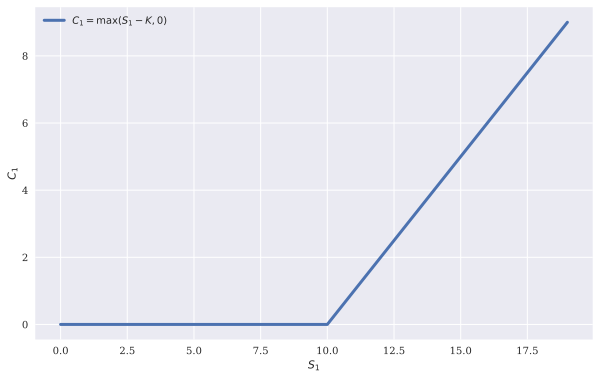

In [101]:
plt.figure(figsize=(10, 6))
plt.plot(S1, C1, lw = 3.0, label='$C_1 = \max(S_1 - K, 0)$')
plt.legend(loc=0)
plt.xlabel('$S_1$')
plt.ylabel('$C_1$');

# Replica

Cuando se introducen en la economía derechos contigentes nos preguntamos si son redundantes o no. Expresado de otro modo, si son linealmente independientes o no.

Decimos que son linealmente dependientes cuando puedo crear una cartera que replique el comportamiento de los derechos contingentes. Concretamente debe cumplirse el siguiente sistema de ecuaciones:
$$b·\left(\begin{array}{crl} B_1 \\ B_1 \end{array}\right)+s·\left(\begin{array}{crl} S_1^u \\ S_1^d \end{array}\right)=\left(\begin{array}{crl} C_1^u \\ C_1^d \end{array}\right)$$
con $b,s \in \mathbb{R}$.

Hemos planteado el siguiente sistema de ecuaciones:
$$\left\{ \begin{array}{crl} b.B_1+s·S_1^u=C_1^u \\ b.B_1+s·S_1^d=C_1^d  \end{array}\right.$$

Con $S_1^u \neq S_1^d$ la solución es:
$$s^*=\frac{C_1^u-C_1^d}{S_1^u-S_1^d}$$
y
$$b^*=\frac{1}{B_1}\frac{C_1^d·S_1^u-C_1^u·S_1^d}{S_1^u-S_1^d}$$

Si suponemos que $B=(10,11)$ $S=(10, (20,5)^T)$ y K=15. La solución será:
- Compramos $s^*=\frac{5-0}{20-5}=\frac{1}{3}$ de acciones
- Compramos $b^*=\frac{1}{11}\frac{0·20-5·5}{20-5}=-\frac{5}{33}$ de bonos (nos endeudamos)

Con el objeto de poder implementarlo con python vamos a plantear el problema de manera distinta. Vamos a definir una matriz cuadrada de 2 elementos $\mathscr{M} \in \mathbb{R}^{2 \times 2}$:

$$\mathscr{M}=\left(\begin{array}{crl} B_1 & S_1^u \\ B_1 & S_1^d\end{array}\right)$$

La réplica se puede plantear de la siguiente manera:

$$\mathscr{M} \phi =C_1$$

donde $\phi\equiv (b,s)^T$ es la cartera réplica:
$$\left(\begin{array}{crl} B_1 & S_1^u \\ B_1 & S_1^d\end{array}\right)·\left(\begin{array}{crl}b \\ s \end{array} \right)=\left(\begin{array}{crl}C_1^u \\ C_1^d \end{array}\right)$$

In [102]:
B = (10, np.array((11, 11)))
S = (10, np.array((20, 5)))
M = np.array((B[1], S[1])).T
M

array([[11, 20],
       [11,  5]])

In [103]:
K=15
C1 = np.maximum(S[1] - K, 0)
C1

array([5, 0])

In [104]:
phi = np.linalg.solve(M, C1)
phi

array([-0.15151515,  0.33333333])

## Determinación del precio a través del arbitraje

Si somos capaces de crear una cartera que se comporta exactamente igual que las opciones, pues el precio de la cartera será el precio de la opción. Si esto no se cumple se generan oportunidades de arbitraje. Por tanto el valor de la opción será:
$$V_0(phi)=\left(\left(\begin{array}{crl} b \\ s \end{array}\right),\left(\begin{array}{crl} B_0 \\ S_0 \end{array}\right)\right)=b·B_0+s·S_0$$
$$V_0(\phi)==b·B_0+s·S_0=\frac{10}{3}-\frac{50}{33}=1.8181$$

Del mismo modo podemos estimar el valor que puede tomar la opción transcurrido un año:

$$V_1(phi)=\left(\left(\begin{array}{crl} B_1 & S_1^u \\ B_1 & S_1^d \end{array}\right),\left(\begin{array}{crl} b \\ s \end{array}\right)\right)=\left(\begin{array}{crl} 5 \\ 0 \end{array}\right)$$

Un mercado está arbitrado cuando se cumple la siguiente condición
$$-\left(\begin{array}{crl}C_1^u \\ C_1^d \end{array}\right)+\left(\begin{array}{crl} B_1 & S_1^u \\ B_1 & S_1^d\end{array}\right)·\left(\begin{array}{crl}b^* \\ s^* \end{array} \right)=\left(\begin{array}{crl}0 \\ 0 \end{array}\right)$$

Formalmente el precio de la opción será aquella que no permita el arbitraje, es decir el precio de la opción será el de la cartera réplica:

$$C_0\equiv V_0(\phi)=\left(\phi^*,\left(\begin{array}{crl}B_0 \\ S_0 \end{array}\right)\right)= b^*·B_0+s^*·S_0$$



In [106]:
phi

array([-0.15151515,  0.33333333])

In [107]:
C0 = np.dot(phi, (B[0], S[0]))
C0

1.8181818181818183

## Mercados completos

El conjunto de derechos contingentes realizables $\mathbb{A}$ incluye todos los derechos contigentes que pueden ser replicados con una cartera de activos financieros. Si las posiciones cortas están prohibidas:
$$\mathbb{A}=\{\mathscr{M}·\phi, \phi, \phi \in \mathbb{R}_{\geq 0}^2 \}$$
Si las posiciones cortas están premitidas:
$$\mathbb{A}=\{\mathscr{M}·\phi, \phi, \phi \in \mathbb{R}^2 \}$$

Si cualquier opciones puede ser replicada con una cartera que combina bonos y acciones decimos que el mercado es completo.

# Acciones Arrow- Debreu

Una activo Arrow-Debreu es definido como un contrato que pagara un euro si se da un estado específico de la naturaleza. Es un caso especial de un derecho contingente.
$$\mathscr{M}·\phi=\left(\begin{array}{crl} 1 \\ 0\end{array}\right)$$
y 
$$\mathscr{M}·\phi=\left(\begin{array}{crl} 0 \\ 1\end{array}\right)$$

¿Por qué este activo es importante? porque a partir de este activo se puede generar el rendimiento de cualquier derecho contingente.

Consideramos dos activos Arrow-Debrey con el siguiente proceso de precios $\gamma^u=\left(\gamma_0^u,(1,0)^T \right)$ y $\gamma^d=\left(\gamma_0^u,(0,1)^T \right)$ y define:
$$\mathscr{M}^{\gamma}=\left(\begin{array}{crl} 1 & 0 \\ 0 & 1 \end{array}\right)$$

Consideramos el resultado de un derecho contigente genérico:
$$C_1=\left(\begin{array}{crl} C_1^u \\ C_1^d \end{array}\right)$$

La cartera réplica $\phi^{\gamma}$ de un derecho contingente es trivial, partiendo de $\phi^{\gamma}=(C_1^u,C_1^d)^T$:
$$\begin{align}
V_1(\phi^{\gamma})&=\mathscr{M}^{\gamma}·\phi^{\gamma} \\
&=\left(\begin{array}{crl} 1 & 0 \\ 0 & 1 \end{array}\right)·\left(\begin{array}{crl} C_1^u \\ C_1^d \end{array}\right) \\
&=\left(\begin{array}{crl} C_1^u \\ C_1^d \end{array}\right)
\end{align}$$

El precio de un derecho contingente será:
$$C_0=V_0(\phi^{\gamma})=C_1^{u}·\gamma_0^u+C_1^{d}·\gamma_0^d $$


# Precios martingalas

En el ámbito de la teoría de probabilidades y procesos estocásticos, una martingala es una secuencia de variables aleatorias en la que la expectativa condicional de una observación futura, dado todo el conocimiento hasta el presente, es igual a la observación actual. Formalmente, si tenemos una secuencia de variables aleatorias $X_1,X_2,...,X_n$ , se dice que esta secuencia es una martingala si, para todo $n$, se cumple que:

$$\mathbb{E}[X_{n+1}|X_1,X_2,...,X_n]=X_n$$
 
Esto significa que, en promedio, la "apuesta" o expectativa para el siguiente paso en una martingala es siempre igual al valor actual, independientemente de los valores pasados.

Un medida martingala $\mathscr{Q}:\wp(\Omega)\leftarrow \mathbb{R}_{\geq 0}$ es un tipo especial de medida de la probabilidad. Hace que el proceso de precio descontado sea una martingala. Para que una acción sea un martingala bajo $\mathscr{Q}$ se debe cumplir la siguiente relación:

$$S_0=\frac{1}{1+i}\E^Q(S_1)$$

Si $i=\frac{B_1-B_0}{B_0}$ entonces el valor del activo sin riesgo será:

$$B_0=\frac{1}{1+i}\E^Q(B_1)=\frac{1}{1+i}B_1$$

Proponemos que la tendencia del procesos de precios derivan, con el tipo de interés libre riesgo, bajo la medida martingala será:
$$\left\{\begin{array}{clr}B_0(1+i)=B_1 \\S_0(1+i)=E^Q(S_1) \end{array}\right.$$

Definimos $q\equiv Q(u)$

$$q·S_1^u+(1-q)·S_d=S_0(1+i)$$

$$q=\frac{S_0(1+i)-S_1^d}{S_1^u-S_1^d}$$

Teniendo en cuenta las anteriores asunciones, $q$ se define como una medida probabilidad y debe cumplirse que $$S_1^u>S_0·(1+i)>S_1^d$$. Por tanto generamos un nuevo espacio de probabilidades $(\Omega,\wp(\Omega),Q)$, donde $Q$ reemplaza a $P$.

Si la anterior igualdad no se cumple generaría un proceso de arbitraje que llevaría a su cumplimiento.

In [108]:
i = (B[1][0] - B[0]) / B[0]
i

0.1

In [109]:
q = (S[0] * (1 + i) - S[1][1]) / (S[1][0] - S[1][1])


## Primer teorema fundamental del precio de los activos

De lo anterior se deduce que las dos frases siguientes son equivalentes:
1. Una medida de martingala existe
2. La economía está arbitrada

### Precio por expectativas

Un corolario del primer teorema fundamental del precio de los activos es que cualquier derecho contingente $C_1 \in \mahtbb{A}$ puede valorarse tomando la expectativa bajo la medida martingala de su retribución futura y descontando con el tipo de interés sin riesgo.

En otras palabras, el proceso de precio descontado de la opción de compra -y de cualquier otro derecho contingente- es una martingala bajo la medida martingala tal que:
$$\left\{\begin{array}{clr}B_0(1+i)=B_1 \\S_0(1+i)=E^Q(S_1) \\ C_0·(1+i)=E^Q(C_1) \end{array}\right.$$


In [110]:
Q = (q, 1-q)
np.dot(Q, C1) / (1 + i)

1.8181818181818181

## Segundo teorema fundamental del precio de los activos

Las dos frases son equivalentes:
1. La medida de la martingala es única
2. El mercado es completo

# Media Varianza de una cartera

Uno de los principales avances de las finanzas ha sido la formalización y cuantificación de la inversión de cartera mediante la teoría de la cartera de varianza media (MVP), de la que fue pionero Markowitz (1952). En cierta medida, este enfoque puede considerarse el comienzo de las finanzas cuantitativas, iniciando una tendencia que llevó cada vez más las matemáticas al campo financiero.

Un activo financiero viene definido por su rentabilidad media y por la desviación típica de la rentabilidad. 

Consideramos el bono sin riesgo $B=(B_0,B_1)$ y una acción con riesgo $S=(S_0,(S_1^u,S_1^d)^T)$ y su matriz de precios futuros $\mathscr{M}$ cuyas columnas recogen los precios futuros de ambos activos. Vamos a estimar la rentabilidad esperada y la volatilidad de un cartera $\phi$ compuesta por una inversión $b$ en el bono y una inversión $s$ en la accción. Lógicamente $b+s=1$.

La rentabilidad esperada será:
$$\begin{align}
E^P(\mathscr{M}·\phi)&=p·(b·B_1+s·S_1^u)+(1-p)·(b·B_1+s·S_1^d) \\
&=p·(b·B_1)+(1-p)·(b·B_1)+p·(s·S_1^u)+(1-p)·(s·S_1^d) \\
&=b·E^P(B_1)+s·E^P(S_1) \\
&=b·(B_1)+s·E^P(S_1)
\end{align}$$

Definimos $\mathscr{R}\in \mathbb{R}^{2\times 2}$ como la matriz de rentabilidades.
$$\mathscr{R}=\left(\begin{array}{clr} i & r_1^u \\ i & r_1^d \end{array}\right)$$

La rentabilidad esperada de una cartera:
$$\begin{align}
E^P(\mathscr{R}·\phi) &=b·E^P(i)+s·E^P(r_1) \\
&=b·i+s·\mu
\end{align}$$